In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:/Project/PowerPulse/household_power_consumption.txt", delimiter = ";", low_memory = False)

In [4]:
df.replace('?', np.nan, inplace = True)

In [5]:
null_values = df[df.isnull().any(axis=1)]
null_values

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990186,28/9/2010,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990187,28/9/2010,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990188,28/9/2010,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
col=['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']

In [7]:
for i in col:
    df[i]=df[i].astype('float64')

In [8]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [9]:
# using median for null values

null_col =['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']

for i in null_col:
    df[i] = df[i].fillna(df[i].median())

In [10]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
#feature Engineering, creating new features with time & date column

In [12]:
df['Datetime'] = pd.to_datetime(df['Date']+" "+df['Time'], format = None, errors = 'coerce', dayfirst = True)
df['Hour'] = df['Datetime'].dt.hour
df['year'] = df['Datetime'].dt.year
df["Day"] = df["Datetime"].dt.day
df["Month"] = df["Datetime"].dt.month
df['Weekday'] = df['Datetime'].dt.weekday

In [13]:
# other than sub_metering, remaining energy consumption 
df['Other_energy_consumption'] = (df['Global_active_power']*1000/60) - (df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3'])

In [14]:
#peak Hours 

def peak_hours(row):
    if 6<= row['Hour'] <=10 or 18<= row['Hour'] <=22:
        return 1.5
    else:
        return 1
df['Peak_hours'] = df.apply(peak_hours, axis = 1)

In [15]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Hour,year,Day,Month,Weekday,Other_energy_consumption,Peak_hours
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,17,2006,16,12,5,88.266667,1.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,17,2006,16,12,5,106.333333,1.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,17,2006,16,12,5,108.566667,1.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,17,2006,16,12,5,107.800000,1.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,17,2006,16,12,5,79.100000,1.0


In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
df=pd.get_dummies(df, columns=['Weekday'], drop_first=True)

In [18]:
df.dtypes

Date                                object
Time                                object
Global_active_power                float64
Global_reactive_power              float64
Voltage                            float64
Global_intensity                   float64
Sub_metering_1                     float64
Sub_metering_2                     float64
Sub_metering_3                     float64
Datetime                    datetime64[ns]
Hour                                 int32
year                                 int32
Day                                  int32
Month                                int32
Other_energy_consumption           float64
Peak_hours                         float64
Weekday_1                             bool
Weekday_2                             bool
Weekday_3                             bool
Weekday_4                             bool
Weekday_5                             bool
Weekday_6                             bool
dtype: object

In [19]:
for i in df.columns:
    if df[i].dtypes == 'bool':
        df[i] = df[i].astype('int64')   

In [20]:
df.dtypes

Date                                object
Time                                object
Global_active_power                float64
Global_reactive_power              float64
Voltage                            float64
Global_intensity                   float64
Sub_metering_1                     float64
Sub_metering_2                     float64
Sub_metering_3                     float64
Datetime                    datetime64[ns]
Hour                                 int32
year                                 int32
Day                                  int32
Month                                int32
Other_energy_consumption           float64
Peak_hours                         float64
Weekday_1                            int64
Weekday_2                            int64
Weekday_3                            int64
Weekday_4                            int64
Weekday_5                            int64
Weekday_6                            int64
dtype: object

In [21]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,...,Day,Month,Other_energy_consumption,Peak_hours,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,...,16,12,88.266667,1.0,0,0,0,0,1,0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,...,16,12,106.333333,1.0,0,0,0,0,1,0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,...,16,12,108.566667,1.0,0,0,0,0,1,0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,...,16,12,107.800000,1.0,0,0,0,0,1,0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,...,16,12,79.100000,1.0,0,0,0,0,1,0


In [22]:
# date,time & datetime columns also dropped that can't be used in model(we created seperate features)
df= df.drop(df[['Date','Time','Datetime']], axis = 1) 

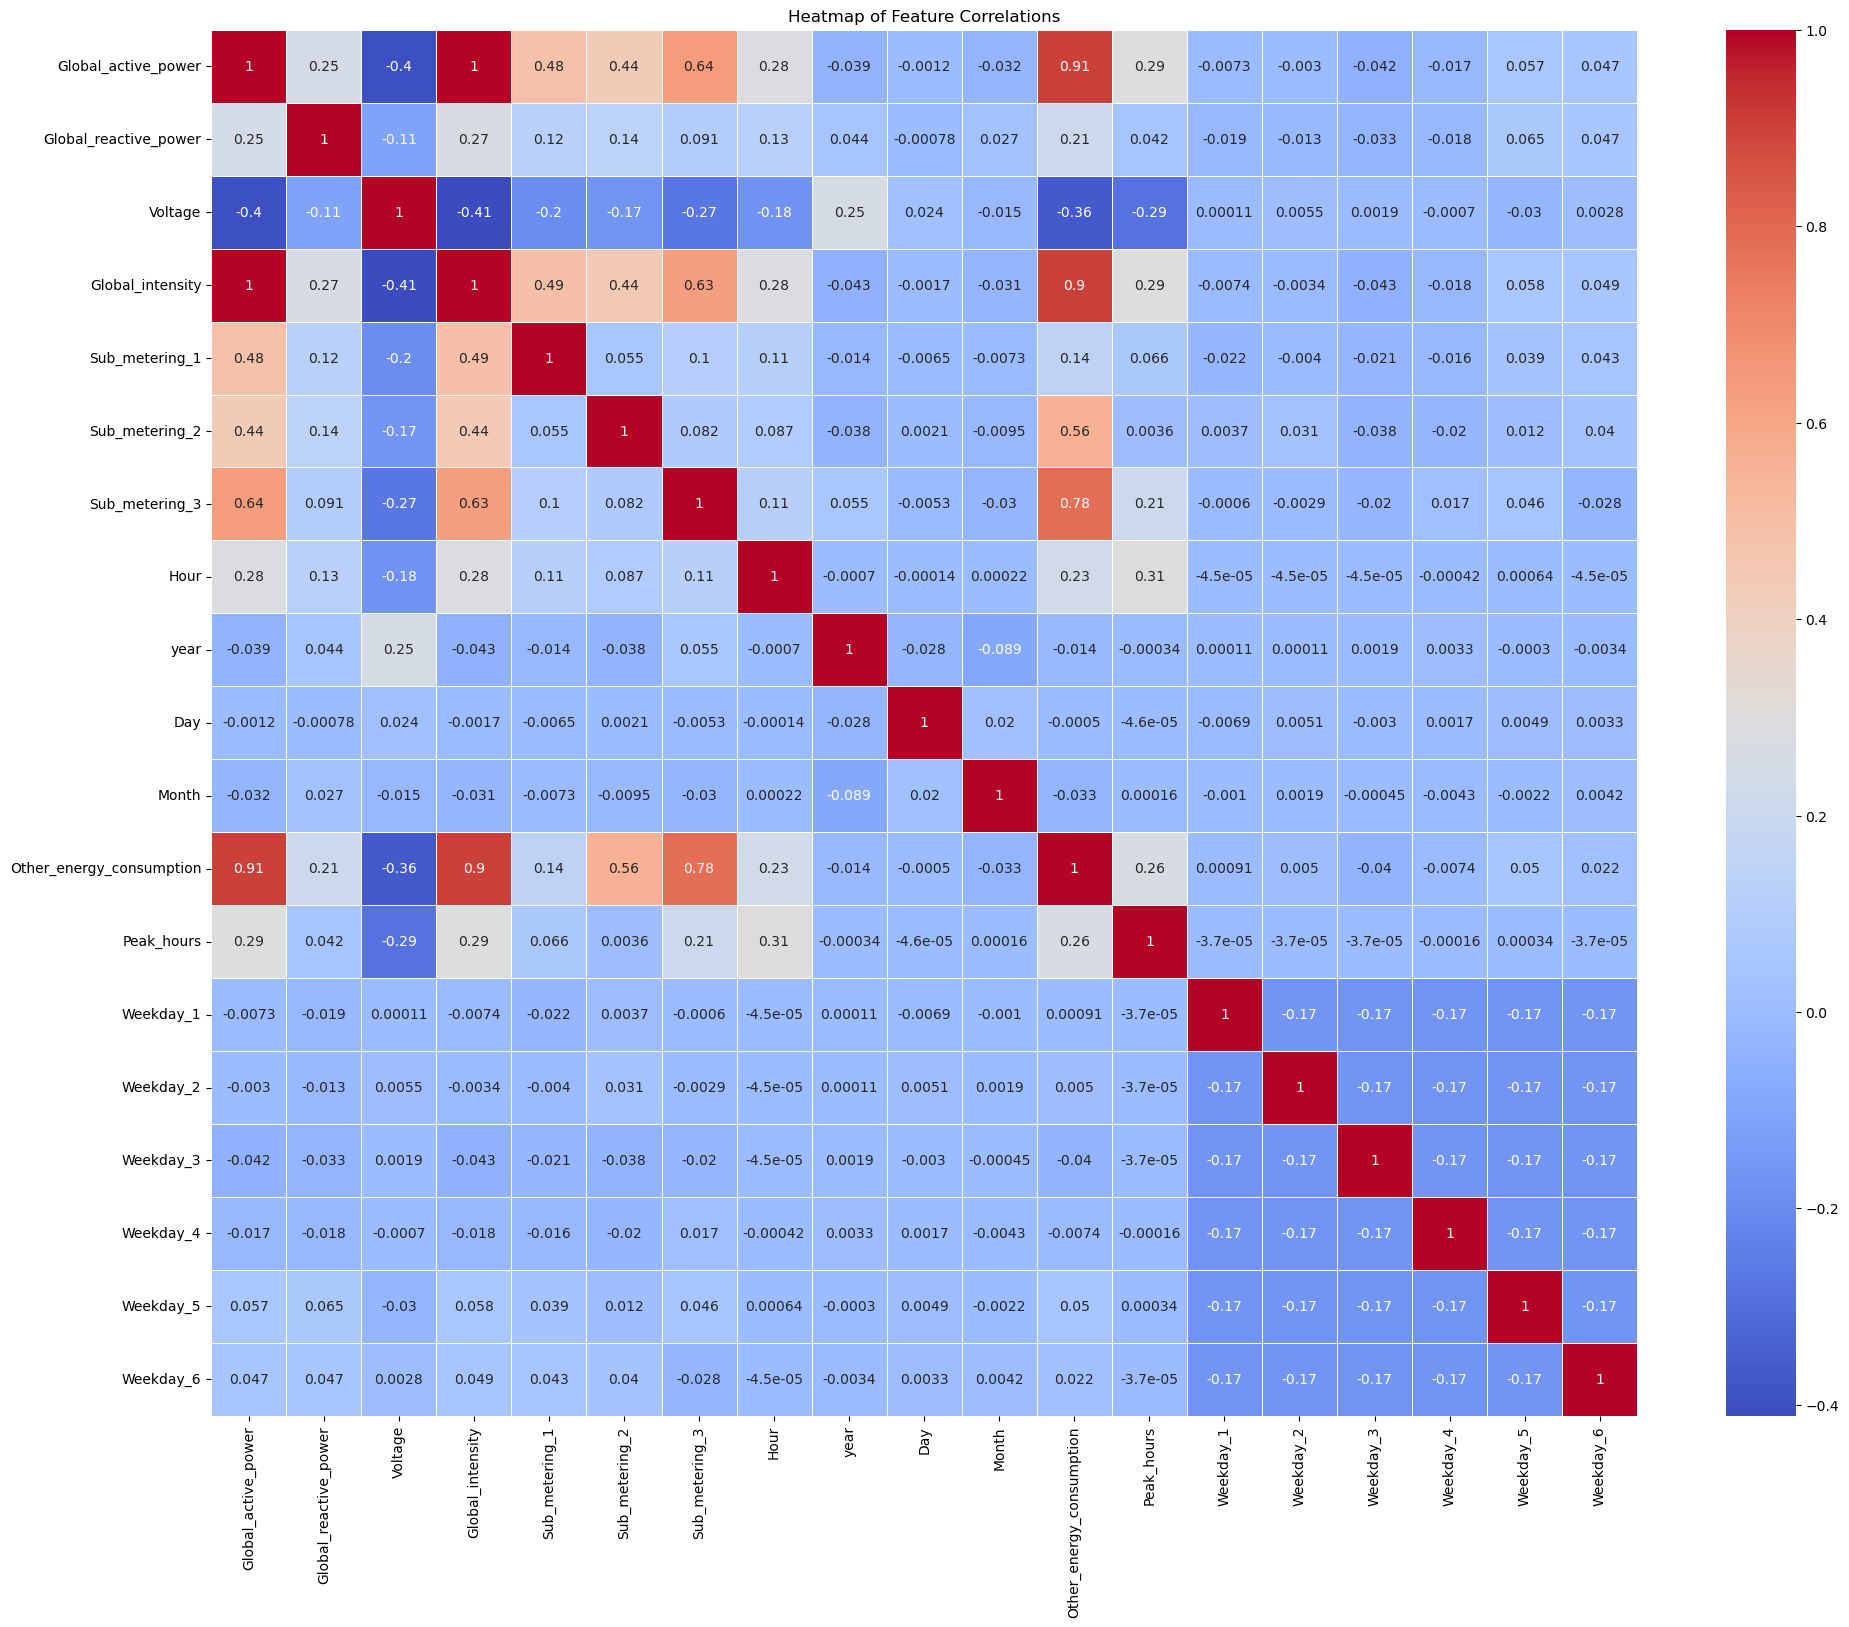

In [21]:
plt.figure(figsize = (23,18))
sns.heatmap(df.corr(), annot =True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [22]:
# from the heatmap we can see that Global_active_power & Global_intensity has Corr of 1, so i am dropping Global_inntensity to avoid multicollinearity
# other_energy_consumption also has high corr bewteen the variable so that also dropped.
# before that i calculate VIF(variance inflation factor) to check my conditions are True

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(df) # Add constant to predictor variables
vif = pd.DataFrame()
vif['variable'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

C:\Users\loges\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                    variable           VIF
0                      const  3.443364e+06
1        Global_active_power           inf
2      Global_reactive_power  1.350534e+00
3                    Voltage  1.486712e+00
4           Global_intensity  6.865246e+02
5             Sub_metering_1           inf
6             Sub_metering_2           inf
7             Sub_metering_3           inf
8                       Hour  1.180969e+00
9                       year  1.112724e+00
10                       Day  1.002569e+00
11                     Month  1.011836e+00
12  Other_energy_consumption           inf
13                Peak_hours  1.255019e+00
14                 Weekday_1  1.715572e+00
15                 Weekday_2  1.717068e+00
16                 Weekday_3  1.714893e+00
17                 Weekday_4  1.714758e+00
18                 Weekday_5  1.723881e+00
19                 Weekday_6  1.728329e+00


In [23]:
df_final = df.drop(df[['Global_intensity','Other_energy_consumption']], axis = 1) 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(df_final) # Add constant to predictor variables
vif = pd.DataFrame()
vif['variable'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

                 variable           VIF
0                   const  3.440171e+06
1     Global_active_power  4.271918e+00
2   Global_reactive_power  1.094027e+00
3                 Voltage  1.344771e+00
4          Sub_metering_1  1.644589e+00
5          Sub_metering_2  1.543724e+00
6          Sub_metering_3  2.270301e+00
7                    Hour  1.178024e+00
8                    year  1.112476e+00
9                     Day  1.002516e+00
10                  Month  1.011828e+00
11             Peak_hours  1.254729e+00
12              Weekday_1  1.715558e+00
13              Weekday_2  1.717023e+00
14              Weekday_3  1.714797e+00
15              Weekday_4  1.714730e+00
16              Weekday_5  1.723874e+00
17              Weekday_6  1.728324e+00


In [26]:
#outlier treatment

In [24]:
def outlier_removal(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    ll = Q1 - (1.5*IQR)
    ul = Q3 + (1.5*IQR)
    return ll,ul

In [25]:
col = ['Global_active_power', 'Global_reactive_power', 'Voltage']

In [26]:
for i in col:
    ll,ul = outlier_removal(df_final[i])
    df_final[i] = np.where(df_final[i]>ul,ul,df_final[i])
    df_final[i] = np.where(df_final[i]<ll,ll,df_final[i])

In [27]:
#Skewness treatment

In [28]:
skew = ['Global_active_power', 'Global_reactive_power',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [29]:
for i in skew:
    print(df_final[i].skew())

1.065140886731885
0.8252797724360789
5.985182060475893
7.136980766149618
0.74453242555942


In [30]:
for i in skew:
    df_final[i] = np.log1p(df_final[i])
    print(df_final[i].skew())

0.5548162140572984
0.6416380712615106
4.950494886510459
3.2419838338036007
0.5264316514968441


In [31]:
#scaling

In [32]:
# create target & independent variables

x = df_final.drop('Global_active_power', axis = 1)
y = df_final['Global_active_power']

In [33]:
# Scaling Since the variable unit are i use standardization method for scaling
from scipy.stats import zscore

In [34]:
x_scaled = x.apply(zscore)

In [35]:
x_scaled.describe()

,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,year,Day,Month,Peak_hours,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,4.335995e-16,4.276899e-14,-1.262862e-16,-8.830858e-17,-2.466286e-16,-4.500341e-17,-6.975940e-14,-1.051814e-16,-1.419949e-16,2.241063e-16,-6.026020e-18,-6.135584e-18,-7.888608e-18,1.205204e-16,2.851951e-16,-6.245148e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.212429e+00,-2.444872e+00,-2.349510e-01,-4.855616e-01,-9.104565e-01,-1.661425e+00,-2.158810e+00,-1.681158e+00,-1.595650e+00,-8.452311e-01,-4.083884e-01,-4.083884e-01,-4.083884e-01,-4.082462e-01,-4.075495e-01,-4.083884e-01
25%,-6.976177e-01,-5.932251e-01,-2.349510e-01,-4.855616e-01,-9.104565e-01,-7.946519e-01,-1.272816e+00,-8.845967e-01,-1.010129e+00,-8.452311e-01,-4.083884e-01,-4.083884e-01,-4.083884e-01,-4.082462e-01,-4.075495e-01,-4.083884e-01
50%,-1.658630e-01,4.649340e-02,-2.349510e-01,-4.855616e-01,-3.764420e-01,7.212137e-02,-3.868230e-01,2.575931e-02,-1.318473e-01,-8.452311e-01,-4.083884e-01,-4.083884e-01,-4.083884e-01,-4.082462e-01,-4.075495e-01,-4.083884e-01
75%,7.161276e-01,6.412065e-01,-2.349510e-01,5.648626e-01,1.316344e+00,9.388947e-01,4.991705e-01,8.223208e-01,7.464344e-01,1.183108e+00,-4.083884e-01,-4.083884e-01,-4.083884e-01,-4.082462e-01,-4.075495e-01,-4.083884e-01
max,2.544817e+00,2.492854e+00,6.938813e+00,6.173970e+00,1.759616e+00,1.661206e+00,1.385164e+00,1.732677e+00,1.624716e+00,1.183108e+00,2.448649e+00,2.448649e+00,2.448649e+00,2.449502e+00,2.453690e+00,2.448649e+00


In [36]:
x_scaled.shape

(2075259, 16)

In [41]:
#Feature selection

In [42]:
from sklearn.feature_selection import mutual_info_regression

In [43]:
mutual_info = mutual_info_regression(x, y)
mutual_info_df_final = pd.DataFrame(mutual_info, index= x.columns, columns=['Mutual Information'])
print(mutual_info_df_final)

                       Mutual Information
Global_reactive_power            0.299255
Voltage                          0.202517
Sub_metering_1                   0.102223
Sub_metering_2                   0.099605
Sub_metering_3                   0.520435
Hour                             0.176369
year                             0.066944
Day                              0.037031
Month                            0.133474
Peak_hours                       0.059474
Weekday_1                        0.001409
Weekday_2                        0.000780
Weekday_3                        0.001808
Weekday_4                        0.002638
Weekday_5                        0.003149
Weekday_6                        0.005000


In [44]:
mutual_info = mutual_info_regression(x_scaled, y)
mutual_info_df_final = pd.DataFrame(mutual_info, index= x.columns, columns=['Mutual Information'])
print(mutual_info_df_final)

                       Mutual Information
Global_reactive_power            0.300184
Voltage                          0.202041
Sub_metering_1                   0.102463
Sub_metering_2                   0.100118
Sub_metering_3                   0.519283
Hour                             0.175894
year                             0.067837
Day                              0.036940
Month                            0.133418
Peak_hours                       0.060790
Weekday_1                        0.000428
Weekday_2                        0.000951
Weekday_3                        0.001878
Weekday_4                        0.001374
Weekday_5                        0.003366
Weekday_6                        0.004839


In [36]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [38]:
sfs = SFS(regression_model,
        k_features=16,
        forward=True,
        floating=True,
        scoring='r2',
        cv=5)
sfs.fit(x_scaled,y)

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          k_features=(16, 16), scoring='r2')

In [39]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

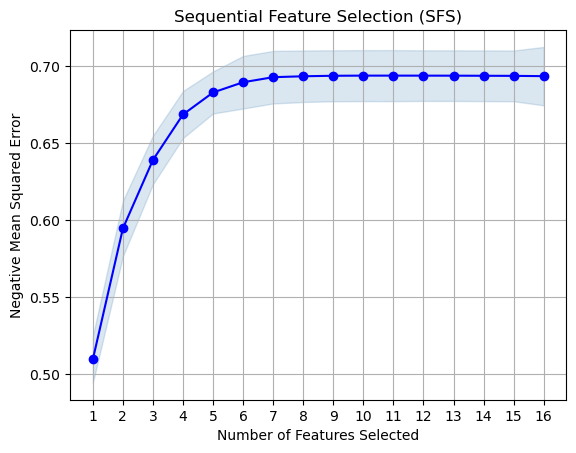

In [40]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Feature Selection (SFS)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Negative Mean Squared Error')
plt.grid()
plt.show()

In [41]:
feature_names = sfs.k_feature_names_
feature_names

('Global_reactive_power',
 'Voltage',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'Hour',
 'year',
 'Day',
 'Month',
 'Peak_hours',
 'Weekday_1',
 'Weekday_2',
 'Weekday_3',
 'Weekday_4',
 'Weekday_5',
 'Weekday_6')

In [42]:
metric = sfs.get_metric_dict()
metric

{1: {'feature_idx': (4,),
  'cv_scores': array([0.50054919, 0.47483403, 0.48122137, 0.54360176, 0.54702304]),
  'avg_score': 0.5094458776262568,
  'feature_names': ('Sub_metering_3',),
  'ci_bound': 0.03920631236609712,
  'std_dev': 0.03050384299972469,
  'std_err': 0.015251921499862346},
 2: {'feature_idx': (2, 4),
  'cv_scores': array([0.57576715, 0.55243171, 0.56935609, 0.63227368, 0.64282996]),
  'avg_score': 0.5945317188540162,
  'feature_names': ('Sub_metering_1', 'Sub_metering_3'),
  'ci_bound': 0.04639707085295488,
  'std_dev': 0.036098497398329196,
  'std_err': 0.018049248699164595},
 3: {'feature_idx': (2, 3, 4),
  'cv_scores': array([0.63545998, 0.60138514, 0.60915047, 0.66727737, 0.6820466 ]),
  'avg_score': 0.6390639136339308,
  'feature_names': ('Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'),
  'ci_bound': 0.04052644025482413,
  'std_dev': 0.0315309473466285,
  'std_err': 0.01576547367331425},
 4: {'feature_idx': (2, 3, 4, 5),
  'cv_scores': array([0.64876439, 0.64

In [ ]:
# based on the feature selection i consider 10 feature as below mentioned.The avg score is 0.69385 after this is does not increase as much.
#feature_names': ('Global_reactive_power','Sub_metering_1','Sub_metering_2','Sub_metering_3''Hour','year','Month','Peak_hours','Weekday_1','Weekday_6')

In [37]:
x_scaled.columns

Index(['Global_reactive_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Hour', 'year', 'Day', 'Month', 'Peak_hours',
       'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5',
       'Weekday_6'],
      dtype='object')

In [38]:
x_scaled_fea = x_scaled.drop(x_scaled[['Voltage','Day','Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5']], axis = 1)

In [39]:
x_scaled_df = pd.DataFrame(x_scaled_fea)

In [40]:
x_scaled_df.to_csv('x.csv', index = False)

In [41]:
y_df = pd.DataFrame(y)

In [42]:
y.to_csv('y.csv', index = False)